In [194]:
! python -m pip install opencv-python numpy matplotlib scipy

In [195]:
import numpy as np
import cv2 as cv
import scipy.signal as signal
import matplotlib.pyplot as plt
import PIL

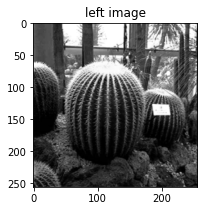

In [196]:
left  = cv.imread('left_image.png')

left  = cv.cvtColor(left, cv.COLOR_BGR2GRAY)

fig = plt.figure()
fig.set_size_inches(10, 15)
plt.subplot(131)
plt.imshow(left, cmap='gray')
plt.title('left image')

plt.show()

In [197]:
# def padding
def padding(image, n=3):
    shape = image.shape
    if len(shape) == 3:
        row, col, clr = shape
        new_shape = (row + 2*n, col + 2*n, clr)
    else:
        row, col = shape
        new_shape = (row + 2*n, col + 2*n)

    image_ = np.zeros(new_shape)
    image_[n: n+row, n: n+col] = image.copy()
    return image_

def coff(image1, image2):
    ans = np.mean((image1 - image1.mean())*(image2 - image2.mean()))
    stds = image1.std() * image2.std()
    
    if stds == 0.0:
        return 0
    
    ans = float(ans) / stds
    return ans
    
def convolution(image, kernel=None):
    if kernel is None:
        kernel = np.array(
                 [[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]],
                  )

    kernel = np.rot90(kernel, 2)
    
    nn, _ = kernel.shape
    n = (nn - 1) // 2

    row, col = image.shape[:2]
    image_pad = padding(image, n)

    image_ = np.zeros(image.shape)

    for i in range(row):
        for j in range(col):
            image_[i][j] = np.sum(kernel * image_pad[i: i+nn, j: j+nn])
    return image_


def cross_correlation(image, kernel=None):
    if kernel is None:
        kernel = np.array(
                 [[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]],
                  )

    # kernel = np.rot90(kernel, 2) # we don't do that here
    nn, _ = kernel.shape[:2]
    n = (nn - 1) // 2

    row, col = image.shape[:2]
    image_pad = padding(image, n)
    
    image_ = np.zeros(image.shape)

    for i in range(row):
        for j in range(col):
            image_[i][j] = np.sum(kernel * image_pad[i: i+nn, j: j+nn])
            # image[i][j] = coff(kernel, image_pad[i: i+nn, j: j+nn])
    return image_

def auto_correlation(image):
    return (image * image) / (image.shape[0] * image.shape[1])

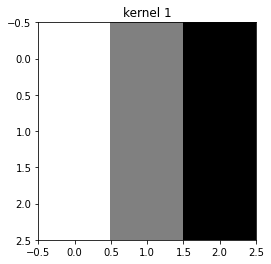

In [198]:
# convolution with vertival edge detection filter
kernel1 = np.array([[1, 0, -1], 
                    [1, 0, -1], 
                    [1, 0, -1]]
                  )
plt.imshow(kernel1, cmap='gray')
plt.title('kernel 1')
plt.show()

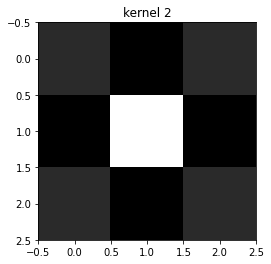

In [199]:
# edge sharpning kernel
kernel2 = np.array(
                 [[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]],
                  )

plt.imshow(kernel2, cmap='gray')
plt.title('kernel 2')
plt.show()

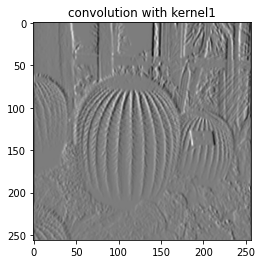

In [202]:
edge_vert = convolution(left, kernel1)
plt.imshow(edge_vert, cmap='gray')
plt.title('convolution with kernel1')
plt.show()

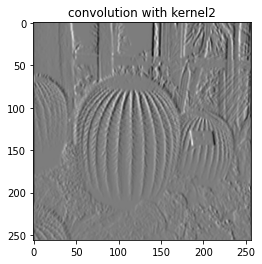

In [203]:
edge_sharp = convolution(left, kernel1)
plt.imshow(edge_sharp, cmap='gray')
plt.title('convolution with kernel2')
plt.show()

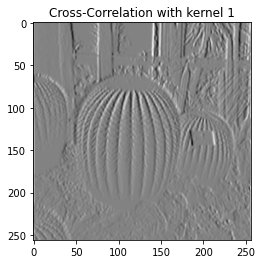

In [204]:
# cross-correlaton with filter 
CCR = cross_correlation(left, kernel1)
plt.imshow(CCR, cmap='gray')
plt.title('Cross-Correlation with kernel 1')
plt.show()

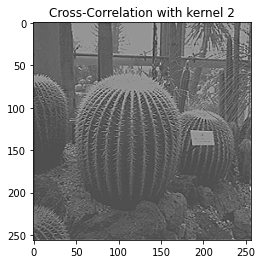

In [205]:
# cross-correlaton with filter 
CCR = cross_correlation(left, kernel2)
plt.imshow(CCR, cmap='gray')
plt.title('Cross-Correlation with kernel 2')
plt.show()

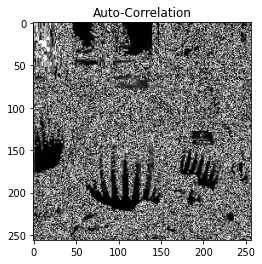

In [206]:
# auto-correlation
ACR = auto_correlation(left)
plt.imshow(ACR, cmap='gray')
plt.title('Auto-Correlation')
plt.show()